In [1]:
%pylab inline
import pynbody
import scipy.stats as sp

Populating the interactive namespace from numpy and matplotlib


Tengo un delta de corte de Kitayama 1996 segun esta relacion 

In [53]:
def delta(z):
    f=(0.276*(1+z)**3)/((0.276*(1+z)**3)+0.704)
    d=6*(np.pi**2)*(1.-0.4093*(1./f)**(0.9052))-1
    return d

In [54]:
delta(0.)

-18.102605799454228

In [55]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s0=pynbody.load(path+'snapshot_050')

In [56]:
s0.properties

{'omegaM0': 0.276,
 'omegaL0': 0.724,
 'boxsize': Unit("5.00e+02 Mpc a h**-1"),
 'a': 1.0,
 'h': 0.703,
 'time': Unit("9.87e-03 s Mpc a**1/2 h**-1 km**-1")}

In [57]:
gas0=s0.gas
pos0=gas0['pos']
ne0=gas0['ne']
u0=gas0['u']
rho0=gas0['rho']

In [59]:
xbox=403.8960 
ybox=459.8882
zbox=440.9021 
xc=408.205481 - xbox + 250 
yc=457.777839 - ybox + 250   
zc=441.538681 - zbox + 250
r0=np.sqrt((pos0[:,0]-xc)**2+(pos0[:,1]-yc)**2+(pos0[:,2]-zc)**2)
rv=8
cutv0, = np.where(r0<rv)

In [60]:
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu0=(1.0-yHe)/(1+yHe+ne0)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
te0=(5./3.-1.)*u0*vv*mu0*mp/kcgs
dgsv=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)*.4  #el 0.4 es porque tengo un 40% de la densidad del universo en esa region (la densidad integrada es 0.6) 
                                                      # cuando se lo mostre a dante lo habia hecho con 0.1
dgs=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)

Text(0.5, 1.0, 'Into The Void')

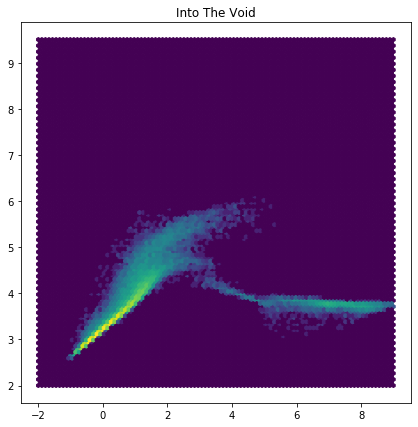

In [7]:
plt.figure(figsize=(7,7))
plt.hexbin(np.log10(rho0[cutv0]/dgsv),np.log10(te0[cutv0]),bins='log',extent=(-2,9,2,9.5))
plt.title('Into The Void')

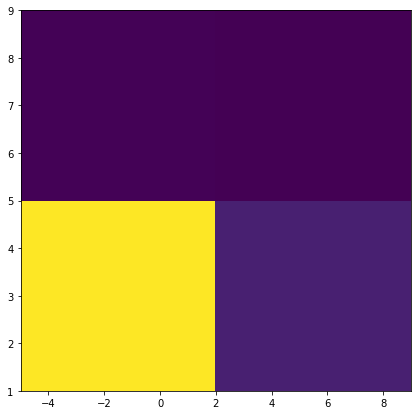

In [8]:
plt.figure(figsize=(7,7))
h=plt.hist2d(np.log10(rho0[cutv0]),np.log10(te0[cutv0]),density='true',bins=2,range=([-5,9],[1,9]))

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


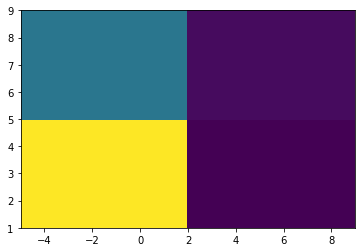

In [9]:
error=[]
z=[]
for i in range(20,50):
    x=str(i)
    print(i)
    path='/mnt/is0/fstasys/512_b/out/'
    s=pynbody.load(path+'snapdir_0'+x+'/'+'snapshot_0'+x+'.0')
    a=s.properties['a']
    redshift=1./a -1
       
    gas=s.gas
    pos=gas['pos']
    u=gas['u']
    ne=gas['ne']
    rho=gas['rho']
       
    mu=(1.0-yHe)/(1+yHe+ne)
    te=(5./3.-1.)*u*vv*mu*(mp/kcgs)#*(a**2)
   
    h2=plt.hist2d(np.log10(rho/dgs),np.log10(te),bins=2,range=([-5,9],[1,9]),density='true')
    
    V=np.array(h[0])
    U=np.array(h2[0])
    err=np.sum((V-U)**2)
    error.append(err)
    z.append(redshift)

Text(0, 0.5, 'error')

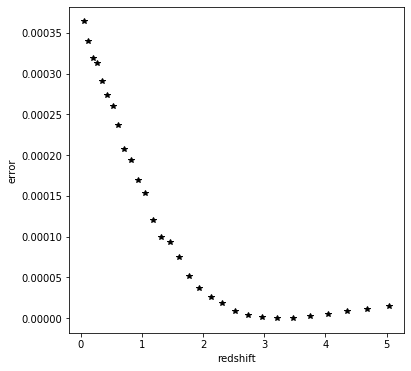

In [10]:
plt.figure(figsize=(6,6))
plt.plot(z,error,ls='none',marker='*',color='black')
plt.xlabel('redshift')
plt.ylabel('error')

In [11]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s1=pynbody.load(path+'snapshot_028')
a=s1.properties['a']
redshift=1./a -1
   
gas1=s1.gas
pos1=gas1['pos']
u1=gas1['u']
ne1=gas1['ne']
rho1=gas1['rho']

In [12]:
dm=s1.dm
mass=dm['mass']

In [13]:
np.min(mass)

SimArray(0.09328805, dtype=float32, '1.00e+10 Msol h**-1')

In [14]:
redshift

2.7363985666082895

In [15]:
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu1=(1.0-yHe)/(1+yHe+ne1)
te1=(5./3.-1.)*u1*vv*mu1*mp/kcgs

Text(0.5, 1.0, 'universo')

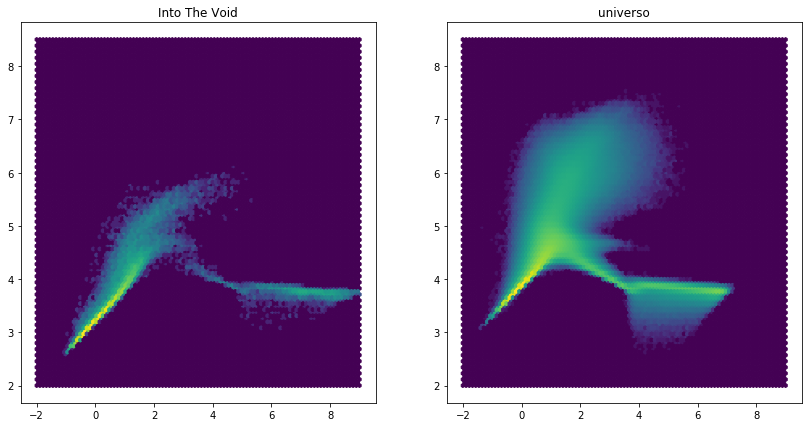

In [16]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.hexbin(np.log10(rho0[cutv0]/dgsv),np.log10(te0[cutv0]),bins='log',extent=(-2,9,2,8.5))
plt.title('Into The Void')

plt.subplot(122)
plt.hexbin(np.log10(rho1/dgs),np.log10(te1),bins='log',extent=(-2,9,2,8.5))
plt.title('universo')

In [ ]:
masa=

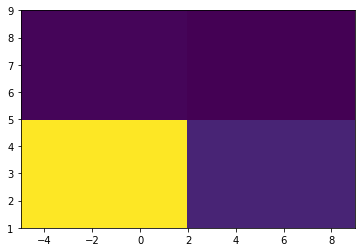

In [10]:
h1=plt.hist2d(np.log10(rho1/dgs),np.log10(te1),bins=2,range=([-5,9],[1,9]),density='true')
h0=plt.hist2d(np.log10(rho0[cutv0]/dgs),np.log10(te0[cutv0]),bins=2,range=([-5,9],[1,9]),density='true')

In [11]:
print('Universo',h1[0])

print('ITV',h0[0])

Universo [[0.02945807 0.00214132]
 [0.00357771 0.00053719]]
ITV [[0.0294967  0.00136622]
 [0.00382994 0.00102143]]


In [36]:
np.sum(h0[0])

0.03571428571428571